### Python Homework 5
#### Uniquename: Qifan
#### Email: qifan@umich.edu
#### It took me approximately 6 hours to complete this.

### Warmup：Around the Semi circular Law

In [1]:
#1.1 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import scipy.stats as sci
import scipy
def wigner_density(x):
    if x>=-2 and x<=2: return np.sqrt(4-x**2)/2/np.pi
    else: return 0

In [2]:
# 1.2 numpy integer???
def generate_wigner(n):
    if not isinstance(n,int): 
        raise TypeError("The input should be an integer!")
    if n<=0:
        raise ValueError("The input should be positive!")
    else: 
        m=np.random.normal(0,1/np.sqrt(n),(n,n))
        return np.matrix(np.triu(m)+np.triu(m,1).T)

In [3]:
# 1.3 array????
def get_spectrum(m):
    return np.linalg.eigh(m)[0]
m=generate_wigner(5)
get_spectrum(m)

array([-2.19172026, -1.28167095, -0.1370019 ,  0.11236208,  1.14724286])

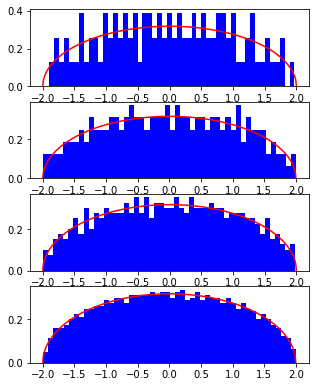

In [4]:
# Plot histogram + density
%matplotlib inline
fig=plt.figure(figsize=(5,6.5))
func=np.vectorize(wigner_density)
num=411
np.random.seed(128)
for i in [100,200,500,1000]:
    ma=generate_wigner(i)
    eigens=get_spectrum(ma)
    plt.subplot(num)
    num+=1
    plt.hist(eigens,50,density=1,color="b")
    nums=np.arange(-2,2.001,0.01)
    plt.plot(nums,func(nums),color="r")
_=plt.show()

#### The semicircular law seems to be a good fit when n>=500. 

### Plotting a misture of normals

In [6]:
# 2.1
dlm=np.loadtxt("C:/Users/lenovo/Desktop/umichcourses/507/qifan_hw5/points.dlm")
npy=np.load("C:/Users/lenovo/Desktop/umichcourses/507/qifan_hw5/labels.npy")

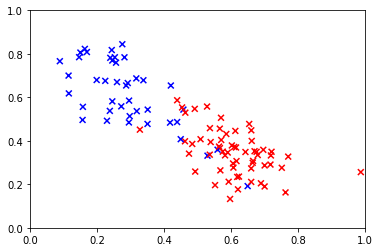

In [7]:
#  2.2 from matplotlib import colors
cmap = mp.colors.ListedColormap(['blue', 'red'])
plt.scatter(dlm[:,0],dlm[:,1],c=npy,cmap=cmap,marker="x",s=35)
plt.xlim(0,1)
plt.ylim(0,1)
_=plt.show()

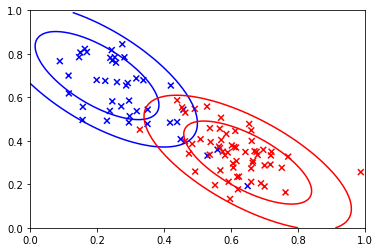

In [8]:
# 2.3
# Adding contours
mu0=np.array([0.2,0.7])
mu1=np.array([0.65,0.3])
sigma0=np.array([[0.015,-0.011],[-0.011,0.018]])
sigma1=np.array([[0.016,-0.011],[-0.011,0.016]])
x,y=np.mgrid[0:1:0.01,0:1:0.01]
pos=np.empty(x.shape+(2,))
pos[:,:,0]=x; pos[:,:,1]=y
rs0=sci.multivariate_normal(mu0,sigma0)
rs1=sci.multivariate_normal(mu1,sigma1)
cmap = mp.colors.ListedColormap(['blue', 'red'])
plt.scatter(dlm[:,0],dlm[:,1],c=npy,cmap=cmap,marker="x",s=35)
plt.xlim(0,1)
plt.ylim(0,1)
# Calculating the correct levels
level01=np.exp(-1/2*sci.chi2.ppf(0.68,df=2))/np.sqrt(np.linalg.det(sigma0)*(2*np.pi)**2)
level02=np.exp(-1/2*sci.chi2.ppf(0.95,df=2))/np.sqrt(np.linalg.det(sigma0)*(2*np.pi)**2)
#level02=
level11=np.exp(-1/2*sci.chi2.ppf(0.68,df=2))/np.sqrt(np.linalg.det(sigma1)*(2*np.pi)**2)
level12=np.exp(-1/2*sci.chi2.ppf(0.95,df=2))/np.sqrt(np.linalg.det(sigma1)*(2*np.pi)**2)

plt.contour(x,y,rs0.pdf(pos),levels=[level02,level01],colors="blue")
plt.contour(x,y,rs1.pdf(pos),levels=[level12,level11],colors="red")
_=plt.show()


## 2.4
##### The data of two clusters look normal, except about 4 or 5 outliers .

In [9]:
# Find the outliers
a=list();b=list()
a.append(dlm[dlm[:,0]==max(dlm[:,0]),:][0,0]);b.append(dlm[dlm[:,0]==max(dlm[:,0]),:][0,1])
a2=dlm[npy==1][dlm[npy==1][:,0]==min(dlm[npy==1][:,0])]
a.append(a2[0,0]);b.append(a2[0,1])
u=dlm[npy==0][dlm[npy==0][:,0]>0.5]
for i in u:
    a.append(i[0])
    b.append(i[1])

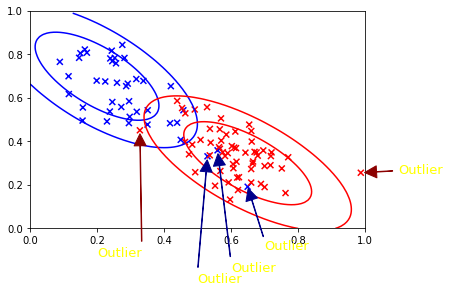

In [10]:
# 2.4 
plt.scatter(dlm[:,0],dlm[:,1],c=npy,cmap=cmap,marker="x")
plt.xlim(0,1)
plt.ylim(0,1)
plt.contour(x,y,rs0.pdf(pos),levels=[level02,level01],colors="blue")
plt.contour(x,y,rs1.pdf(pos),levels=[level12,level11],colors="red")
_=plt.annotate("Outlier",xy=(a[0],b[0]),xytext=(1.1,0.25),color="yellow",fontsize=13,arrowprops=dict(color="darkred",width=0.5,shrink=0.1))
_=plt.annotate("Outlier",xy=(a[1],b[1]),xytext=(0.2,-0.13),color="yellow",fontsize=13,arrowprops=dict(color="darkred",width=0.5,
                                                                                                     shrink=0.03))
_=plt.annotate("Outlier",xy=(a[2],b[2]),xytext=(0.7,-0.1),color="yellow",fontsize=13,arrowprops=dict(color="darkblue",width=0.5,
                                                                                                     shrink=0.03))
_=plt.annotate("Outlier",xy=(a[3],b[3]),xytext=(0.5,-0.25),color="yellow",fontsize=13,arrowprops=dict(color="darkblue",width=0.5,
                                                                                                      shrink=0.03))
_=plt.annotate("Outlier",xy=(a[4],b[4]),xytext=(0.6,-0.2),color="yellow",fontsize=13,arrowprops=dict(color="darkblue",width=0.5,
                                                                                                     shrink=0.03))

### Conway's Game of Life

In [11]:
# 3.1 
# Two dimension
def is_valid_board(m):
    if not isinstance(m,np.ndarray): return False
    if len(m.shape)!=2: return False
    for i in np.nditer(m):
        if i!=0.0 and i!=1.0: return False
    return True


In [12]:
# 3.2
def gol_step(ma):
    if is_valid_board(ma)==False: 
        raise TypeError("The input matrix is not a valid board!")
    m,n=ma.shape
    it=np.nditer(ma,flags=["multi_index"])
    ma_new=np.zeros((m,n))
    for i in it:
        count_live,count_die=0,0
        x,y=it.multi_index
        for j,k in list(zip([-1,-1,-1,0,0,1,1,1],[-1,0,1,-1,1,-1,0,1])):
            if ma[(x+j)%m,(y+k)%n]==1.0: count_live+=1
            else: count_die+=1
        if ma[x,y]==1.0 and (count_live<2 or count_live>3):ma_new[x,y]=0.0
        elif ma[x,y]==1.0 and (count_live==2 or count_live==3):ma_new[x,y]=1.0
        elif ma[x,y]==0.0 and count_live==3: ma_new[x,y]=1.0
        else: ma_new[x,y]=0.0
    return ma_new


In [13]:
# 3.3
cmap = mp.colors.ListedColormap(['white', 'black'])
def draw_gol_board(m):
    _=plt.imshow(m,cmap=cmap)
    plt.xticks([])
    plt.yticks([])



In [14]:
#x=np.array([[0,0,0,1,0],[1,0,1,0,0],[0,1,0,1,0]])
#draw_gol_board(x)

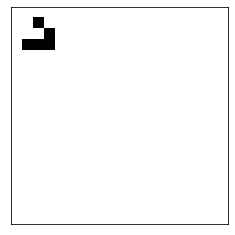

In [15]:
# 3.4 
ma_new=np.zeros((20,20))
ma_new[1,2]=1; ma_new[2,3]=1;ma_new[3,1]=1;ma_new[3,2]=1;ma_new[3,3]=1
draw_gol_board(ma_new)

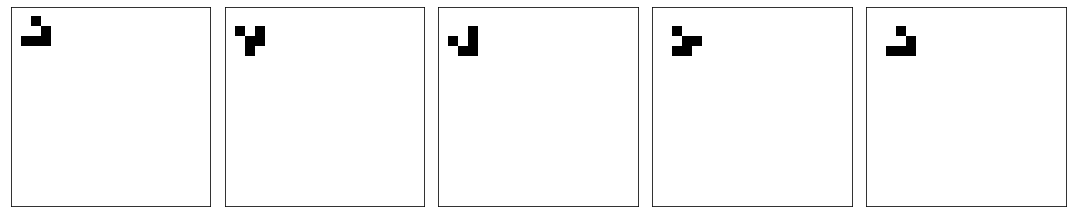

In [16]:
# 4.5
%matplotlib inline
fig=plt.figure(figsize=(15, 15))
plt.subplot(151)
draw_gol_board(ma_new)
num=152 ; mat=ma_new
for i in range(4):
    plt.subplot(num)
    num+=1
    mat=gol_step(mat)
    draw_gol_board(mat)
_=plt.tight_layout()